In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
encoder = LabelEncoder()

In [3]:
data_train = pd.read_csv('train.csv')

In [4]:
data_train.head()
data_train = data_train.dropna()
X_names = ['Sex','Age','SibSp','Parch','Fare','Embarked'] #'Age'
y_names = ['Survived']

In [5]:
X = data_train[X_names]
y = data_train[y_names]

In [6]:
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])

C:\Users\rcpsi\AppData\Local\Temp\ipykernel_22920\1565317988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = encoder.fit_transform(X['Sex'])
C:\Users\rcpsi\AppData\Local\Temp\ipykernel_22920\1565317988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = encoder.fit_transform(X['Embarked'])


In [7]:
X.head()


,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,38.0,1,0,71.2833,0
3,0,35.0,1,0,53.1000,2
6,1,54.0,0,0,51.8625,2
10,0,4.0,1,1,16.7000,2
11,0,58.0,0,0,26.5500,2


In [8]:
mask = X.isnull()
rows_with_nan = X[mask.any(axis=1)]
print(X.shape)
print(len(rows_with_nan))
print(rows_with_nan)


(183, 6)
0
Empty DataFrame
Columns: [Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [9]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X,y)

DecisionTreeClassifier(max_depth=2)

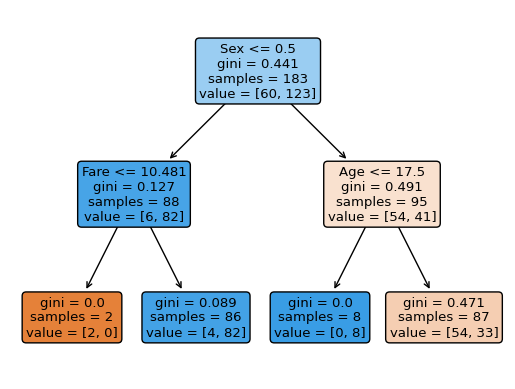

In [10]:
fig = plot_tree(model, 
          feature_names = X_names, 
          filled = True, 
          rounded = True)